Assignment Description:
You have been given a dataset containing information about patients who have been tested for a particular disease. Your task is to build a binary classification model that predicts whether a patient has the disease or not based on the provided features.


In [1]:
## importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## loading the dataset

df = pd.read_csv('dataset.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,Female,112,Low,High,No
1,25,Male,130,Low,High,No
2,19,Female,151,High,High,Yes
3,65,Female,98,Low,Low,No
4,35,Female,132,Low,Low,Yes


In [3]:
## shape of dataset
df.shape

(5000, 6)

In [4]:
## tryig to make the variable discrete

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [5]:
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [6]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,0,112,Low,High,No
1,25,1,130,Low,High,No
2,19,0,151,High,High,Yes
3,65,0,98,Low,Low,No
4,35,0,132,Low,Low,Yes


In [7]:
df['Cholesterol'].unique()

array(['Low', 'High'], dtype=object)

In [8]:
df['Cholesterol'] = df['Cholesterol'].map({'Low':0,'High':1})

In [9]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,0,112,0,High,No
1,25,1,130,0,High,No
2,19,0,151,1,High,Yes
3,65,0,98,0,Low,No
4,35,0,132,0,Low,Yes


In [10]:
df['Blood Sugar'].unique()

array(['High', 'Low'], dtype=object)

In [11]:
df['Blood Sugar'] = df['Blood Sugar'].map({'Low':0,'High':1})

In [12]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,0,112,0,1,No
1,25,1,130,0,1,No
2,19,0,151,1,1,Yes
3,65,0,98,0,0,No
4,35,0,132,0,0,Yes


In [13]:
df['Disease'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Disease'] = df['Disease'].map({'No':0,'Yes':1})

In [15]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
0,58,0,112,0,1,0
1,25,1,130,0,1,0
2,19,0,151,1,1,1
3,65,0,98,0,0,0
4,35,0,132,0,0,1


In [16]:
df.isna().count()

## we see no nan values

Age               5000
Gender            5000
Blood Pressure    5000
Cholesterol       5000
Blood Sugar       5000
Disease           5000
dtype: int64

# Lets Do Some Basic Analysis

In [17]:
## %age of people having Disease

df[df['Disease']==1].count()[0]   ## people having disease

2477

In [18]:
per_yes = ((df[df['Disease']==1].count()[0])/(df['Disease'].count()))*100
print("Percentage of People Having Disease:",per_yes,'%')

Percentage of People Having Disease: 49.54 %


([<matplotlib.patches.Wedge at 0x7fb74005dca0>,
 [Text(-0.015895865654657084, 1.0998851401192258, 'No'),
  Text(0.015895865654656702, -1.0998851401192258, 'Yes')],
 [Text(-0.008670472175267499, 0.5999373491559413, '50.46%'),
  Text(0.008670472175267292, -0.5999373491559413, '49.54%')])

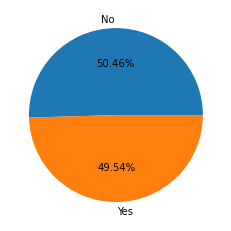

In [19]:
disease_count = df['Disease'].value_counts().values
plt.pie(disease_count,labels=['No','Yes'],autopct="%1.2f%%")

In [20]:
## conclusion - 49.54% have disease (which is a great number)

In [21]:
## percentage of male and female having disease

df_1 = df[df['Disease']==1]

In [22]:
df_1.head()

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar,Disease
2,19,0,151,1,1,1
4,35,0,132,0,0,1
5,33,0,92,1,0,1
7,26,1,138,1,0,1
8,65,1,155,0,0,1


In [23]:
count_male = df_1[df_1['Gender']==1].count()[0]
count_male

1261

In [24]:
per_male = ((df_1[df_1['Gender']==1].count()[0])/(df_1['Gender'].count()))*100
print("Percentage of Male Having Disease:",per_male,"%")

Percentage of Male Having Disease: 50.9083568833266 %


In [25]:
count_female = df_1[df_1['Gender']==0].count()[0]
count_female

1216

In [26]:
per_female = ((df_1[df_1['Gender']==0].count()[0])/(df_1['Gender'].count()))*100
print("Percentage of Female Having Disease:",per_female,"%")

Percentage of Female Having Disease: 49.091643116673396 %


([<matplotlib.patches.Wedge at 0x7fb7832b21c0>,
 [Text(-0.031386300847866686, 1.0995521361532101, 'Male'),
  Text(0.031386300847866797, -1.0995521361532101, 'Female')],
 [Text(-0.017119800462472735, 0.5997557106290236, '50.91%'),
  Text(0.017119800462472794, -0.5997557106290236, '49.09%')])

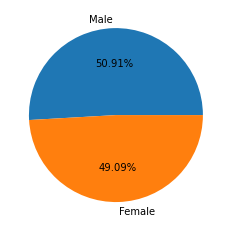

In [27]:
gender_count = df_1['Gender'].value_counts().values
plt.pie(gender_count,labels=['Male','Female'],autopct="%1.2f%%")

In [28]:
## Conclusion - percentage of male and female are almost equal in general

In [29]:
##  finding percentage of people having high cholesterol in df_1

## Number of People having high Cholesterol and have disease
chol_count = df_1['Cholesterol'].value_counts()[1]
chol_count

1290

In [30]:
per_chol = chol_count / len(df_1) *100
per_chol

52.079127977392005

In [31]:
print("Percentage of people having high cholesterol among the people having disease:",per_chol,'%')


Percentage of people having high cholesterol among the people having disease: 52.079127977392005 %


In [32]:
##  finding percentage of people having high Blood Sugar in df_1

## Number of People having high Blood Sugar and have disease
sug_count = df_1['Blood Sugar'].value_counts()[1]
sug_count

1269

In [33]:
per_sug = sug_count / len(df_1) *100
per_sug

51.23132821962051

In [34]:
print("Percentage of people having high Blood Sugar among the people having disease:",per_sug,'%')


Percentage of people having high Blood Sugar among the people having disease: 51.23132821962051 %


In [35]:
## finding percentage of people having high Blood sugar as well as high cholesterol in df_1


## Number of people having high Blood Sugar and High cholesterol
both_count = len(df_1[df_1['Blood Sugar']==1][df_1['Cholesterol']==1])
both_count

<ipython-input-35-5a66b010e79b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  both_count = len(df_1[df_1['Blood Sugar']==1][df_1['Cholesterol']==1])


670

In [36]:
per_both = both_count / len(df_1) * 100
per_both

27.048849414614452

In [37]:
print("Percentage of people having both high Blood sugar and High Blood pressure:",per_both,'%')

Percentage of people having both high Blood sugar and High Blood pressure: 27.048849414614452 %


In [38]:
df['Age'].unique()

array([58, 25, 19, 65, 35, 33, 32, 26, 24, 61, 52, 23, 55, 45, 20, 31, 50,
       56, 53, 30, 63, 59, 62, 44, 46, 69, 73, 18, 66, 28, 39, 27, 42, 40,
       72, 34, 64, 47, 36, 71, 57, 74, 41, 54, 22, 60, 67, 38, 21, 70, 43,
       49, 68, 51, 29, 37, 48])

In [39]:
## Lets find the number of people effected in different age groups 
## ex - 18-30,31-50,51-above

In [40]:
## number of people effected in 18-30

len(df_1[df_1['Age']<31]) ## because the min unique value is 18

537

In [41]:
## number of people effected in 31-50

len(df_1[df_1['Age']<51][df_1['Age']>30])

<ipython-input-41-6f8f3e84287a>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df_1[df_1['Age']<51][df_1['Age']>30])


902

In [42]:
## number of people effected in 51-above

len(df_1[df_1['Age']>50])

1038

In [43]:
## conclusion - most people are effected in the age group of 51-above

# Splitting the data for model building

In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
X

,Age,Gender,Blood Pressure,Cholesterol,Blood Sugar
0,58,0,112,0,1
1,25,1,130,0,1
2,19,0,151,1,1
3,65,0,98,0,0
4,35,0,132,0,0
...,...,...,...,...,...
4995,47,1,124,1,1
4996,38,0,142,1,1
4997,44,0,91,0,1
4998,25,1,143,1,1


In [46]:
y

0       0
1       0
2       1
3       0
4       1
       ..
4995    1
4996    0
4997    1
4998    0
4999    1
Name: Disease, Length: 5000, dtype: int64

# Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Model Building

In [48]:
## Firstly Applying Logistic Regression Model

from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [49]:
from sklearn.model_selection import GridSearchCV

parameter = {'C':[0.001,0.01,0.1,0.4,0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor = GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.4, 0.5, 1, 2, 3, 5, 6, 7, 9,
                               10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [50]:
print(log_regressor.best_params_)

{'C': 0.001, 'penalty': 'l2'}


In [51]:
prediction_log =log_regressor.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [53]:
confusion_matrix(y_test,prediction_log)

array([[288, 217],
       [309, 186]])

In [54]:
accuracy_score(y_test,prediction_log)

0.474

In [55]:
precision_score(y_test,prediction_log)

0.46153846153846156

In [56]:
recall_score(y_test,prediction_log)

0.37575757575757573

In [57]:
f1_score(y_test,prediction_log)

0.4142538975501113

In [58]:
## Random Forest Regressor

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)

In [59]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [60]:
predict_log = clf.predict(X_test)

In [61]:
confusion_matrix(y_test,predict_log)

array([[272, 233],
       [247, 248]])

In [62]:
accuracy_score(y_test,predict_log)

0.52

In [63]:
precision_score(y_test,predict_log)

0.5155925155925156

In [64]:
recall_score(y_test,predict_log)

0.501010101010101

In [65]:
f1_score(y_test,predict_log)

0.5081967213114753

In [66]:
from sklearn.ensemble import ExtraTreesClassifier

In [67]:
clf = ExtraTreesClassifier(n_estimators=200, random_state=0)

In [68]:
clf.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=200, random_state=0)

In [69]:
predict_log = clf.predict(X_test)

In [70]:
confusion_matrix(y_test,predict_log)

array([[283, 222],
       [259, 236]])

In [71]:
accuracy_score(y_test,predict_log)

0.519

In [72]:
precision_score(y_test,predict_log)

0.5152838427947598

In [73]:
recall_score(y_test,predict_log)

0.4767676767676768

In [74]:
f1_score(y_test,predict_log)

0.4952780692549842

'''
Summary -
We have imported the dataset firstly.
Then we applied encoding to make the processing faster.
After that we have done some Basic Data Analysis About the data.
Then we Applied 2 ML model to the data and got the following accuracy score
Logistic Regression - 0.474
Random Forest - 0.52
Extra Tree Classifier - 0.519

we got best accuracy score in Random Forest
'''